In [1]:
using Revise
using SurfaceRegistration
using PyPlot

┌ Info: Precompiling SurfaceRegistration [6bd7b077-53e3-4ae0-9620-25197cb37145]
└ @ Base loading.jl:1260


## Define Surface and Mapping 

In [2]:
figurefolder = "same-orbit1/"

af1(x) = 1.
f1(x) = [x[1], x[2], 0.]
q1(x) = [x[1], x[2], 0.]
Dq1(x) = [[1. 0.]; [0. 1.]; [0. 0.]]

γ(x) = [0.9x[1]^2+0.1x[1], x[2]]

f2 = f1 ∘ γ
a(x) = 1.8x[1] + 0.1
q2(x) = √(1.8x[1] + 0.1) * [0.9x[1]^2 + 0.1*x[1], x[2], 0.]
Dq2(x) = 0.9 / √(1.8x[1] + 0.1) * [[0.9x[1]^2+0.1x[1] 0.]; [x[2] 0.]; [0. 0.]] +
            √(1.8x[1] + 0.1) * [[1.8x[1] + 0.1 0.]; [0. 1.]; [0. 0.]]

Dq2 (generic function with 1 method)

In [3]:
#### Plot Once to Fix PyPlot Projection Bug

figure(figsize=(0.1, 0.1))
plot_surface([0. 0.], [0. 0], [0. 0]);
show()

## Plots of Functions with Q-Maps and Their Varying Diffeomorphism

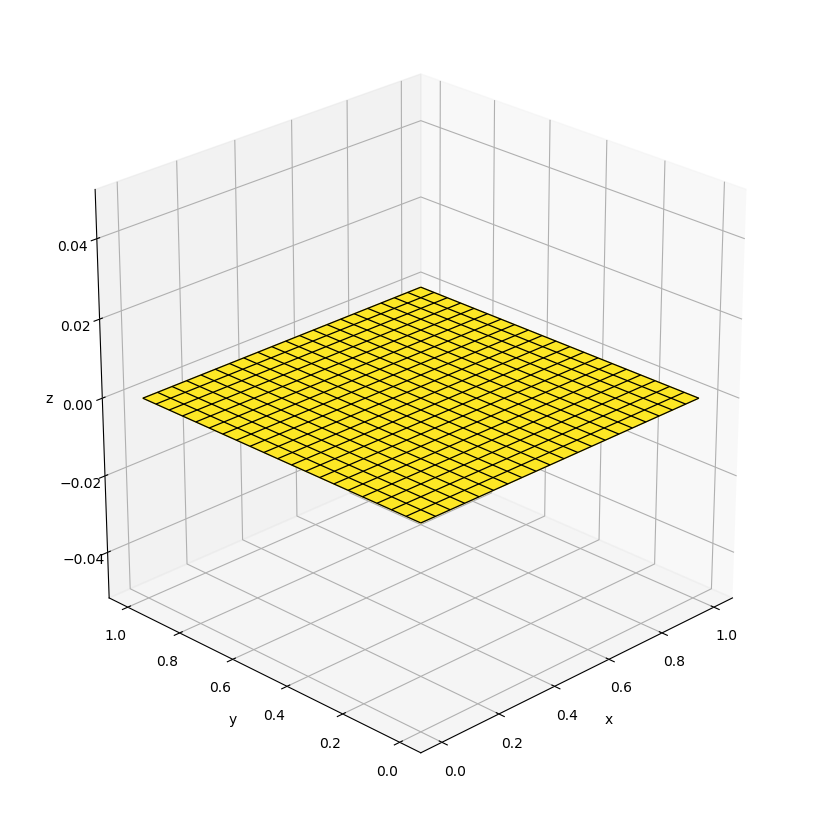

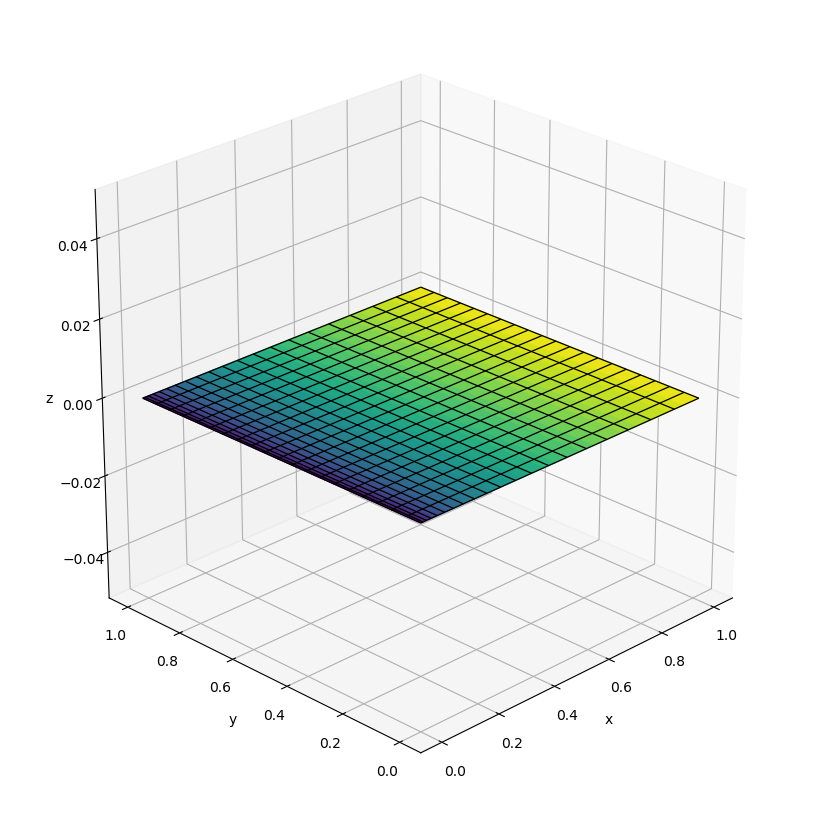

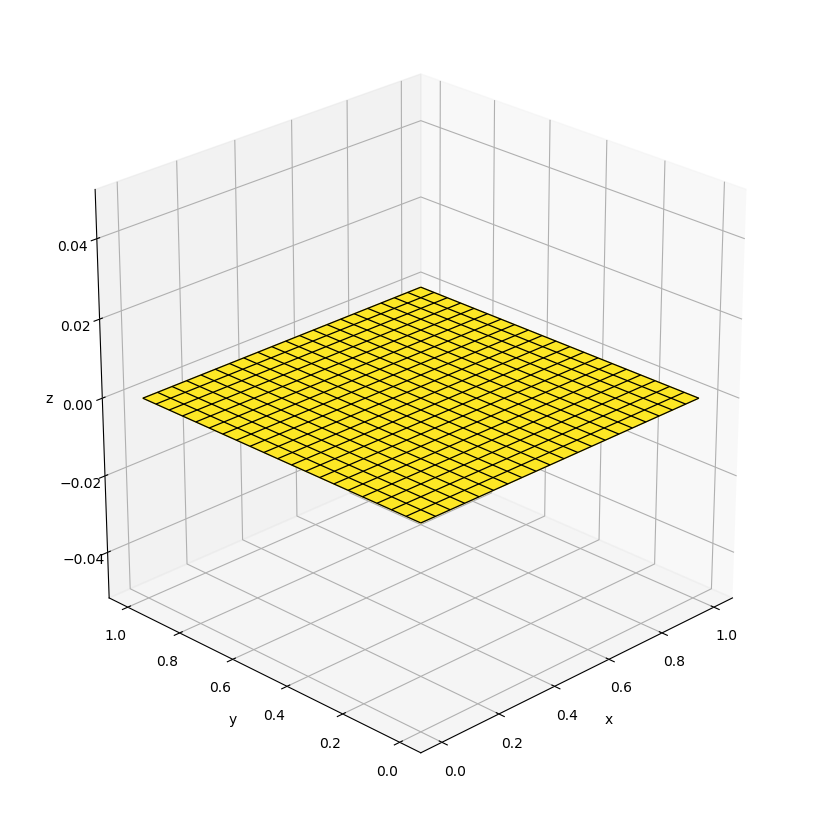

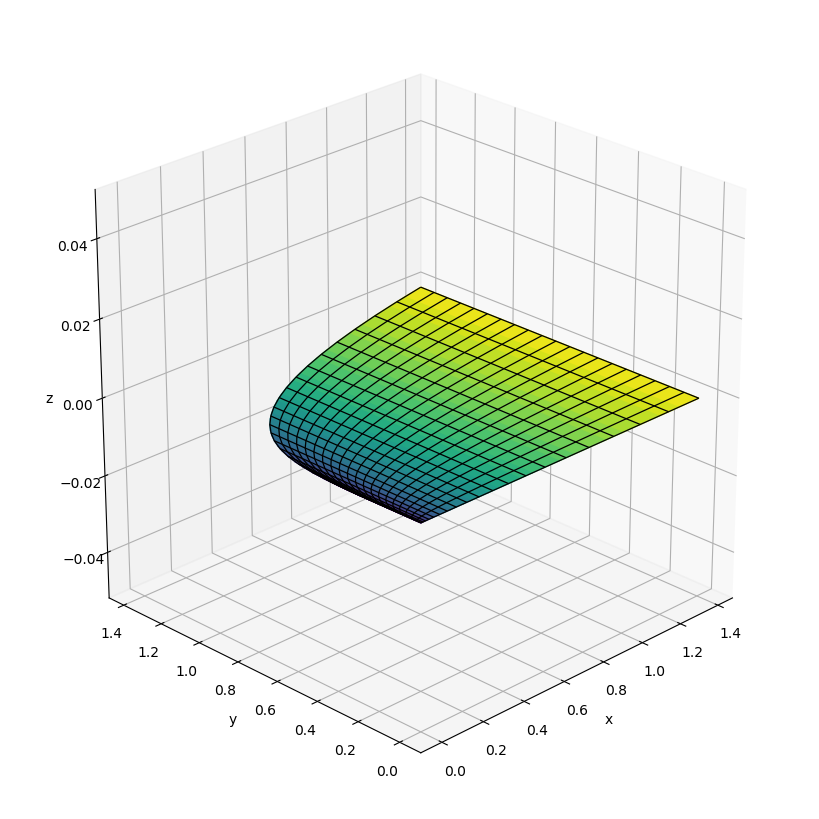

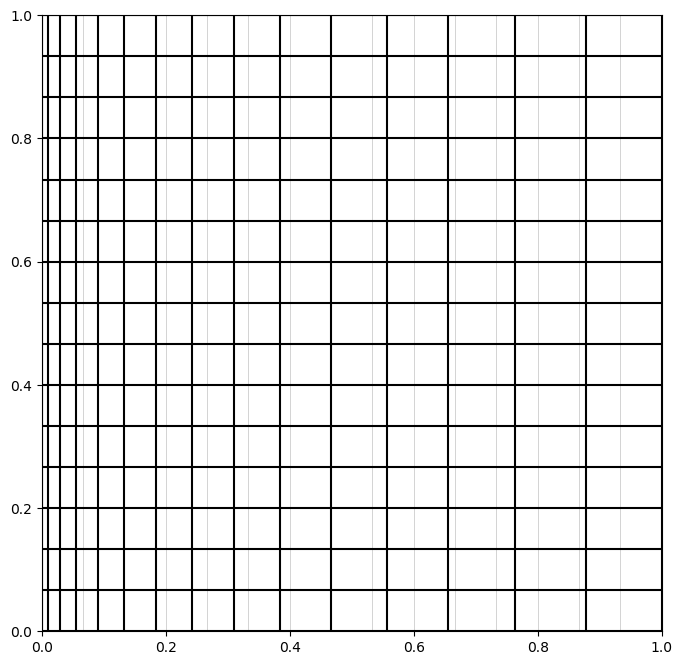

In [4]:
# Figure Regular 
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f1, n_points=31, axis=ax, colorfunc=af1, colormap="viridis", shade=false)
plot_parametric_wireframe(f1, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "regular-surface.pdf")


# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f2, n_points=31, axis=ax, colorfunc=a, colormap="viridis", shade=false)
plot_parametric_wireframe(f2, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "warped-surface.pdf")

# Figure Regular 
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(q1, n_points=31, axis=ax, colorfunc=af1, colormap="viridis", shade=false)
plot_parametric_wireframe(q1, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "regular-qmap.pdf")


# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(q2, n_points=31, axis=ax, colorfunc=a, colormap="viridis", shade=false)
plot_parametric_wireframe(q2, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "warped-qmap.pdf")

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plot_diffeomorphism(γ, axis=ax)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig(figurefolder * "base-diffeomorphsim.pdf")
show()

## Regular To Warped Matching

In [26]:
B1, DB1, divB1 = construct_basis(1);
R, DR, Γ, errors = SurfaceRegistrationAlgorithm(q2, q1, Dq1, B1, DB1, divB1,
    max_iter=6, error_change_tol=1e-10,
    grad_norm_tol=1e-4,
    armijo_constant=0.5, armijo_scaling=0.9, armijo_max_iter=100,
    verbose=true
)
# Construct Composed Diffeomorphism
ψ = ∘(Γ...)
a_rw = af(f2∘ψ)

[SurfaceRegistration] Iter 0	Error=0.24379209189127726
[SurfaceRegristration] Gradient Norm:2.1344485027394993
------------------------------------------------------------
[Armijo] Iter 0:	 0.04442492177603853 	 0.11176279238328052
[Armijo] Step Size: 	 0.12371279919711455
------------------------------------------------------------
[SurfaceRegistration] Iter 1	Error=0.04442492177603853
[SurfaceRegristration] Gradient Norm:0.8309230809035508
------------------------------------------------------------
[Armijo] Iter 0:	 0.2561600627343697 	 -0.008892204742941355
[Armijo] Iter 1: 	 0.2182693572380697 	 -0.0035604920910433657
[Armijo] Iter 2: 	 0.1877239809214495 	 0.001238049295664824
[Armijo] Iter 3: 	 0.1622791303234802 	 0.005556736543702194
[Armijo] Iter 4: 	 0.14073779705368428 	 0.009443555066935824
[Armijo] Iter 5: 	 0.12233642291716901 	 0.012941691737846095
[Armijo] Iter 6: 	 0.10654116755767604 	 0.01609001474166534
[Armijo] Iter 7: 	 0.0929584710830803 	 0.01892350544510266
[A

[Armijo] Iter 4: 	 0.17647982503874002 	 0.025452507108449964
[Armijo] Iter 5: 	 0.1597221220884984 	 0.026292970946145845
[Armijo] Iter 6: 	 0.14478758413827383 	 0.027049388400072136
[Armijo] Iter 7: 	 0.1314456451626907 	 0.0277301641086058
[Armijo] Iter 8: 	 0.11951409801383721 	 0.0283428622462861
[Armijo] Iter 9: 	 0.10884357901148159 	 0.028894290570198367
[Armijo] Iter 10: 	 0.09930818892600823 	 0.02939057606171941
[Armijo] Iter 11: 	 0.09079949233499662 	 0.029837233004088345
[Armijo] Iter 12: 	 0.0832224783016974 	 0.03023922425222039
[Armijo] Iter 13: 	 0.07649270766151044 	 0.030601016375539226
[Armijo] Iter 14: 	 0.07053420599159964 	 0.030926629286526182
[Armijo] Iter 15: 	 0.06527784735147865 	 0.031219680906414443
[Armijo] Iter 16: 	 0.0606600838042346 	 0.03148342736431388
[Armijo] Iter 17: 	 0.05662194304204584 	 0.03172079917642337
[Armijo] Iter 18: 	 0.05310825689618556 	 0.03193443380732191
[Armijo] Iter 19: 	 0.05006710446106817 	 0.03212670497513059
[Armijo] Ite

[Armijo] Iter 61: 	 0.033860104707648 	 0.033836464572555396
[Armijo] Iter 62: 	 0.03385954114011455 	 0.03383853257495136
[Armijo] Iter 63: 	 0.03385908474312383 	 0.033840393777107736
[Armijo] Iter 64: 	 0.0338587151512974 	 0.03384206885904847
[Armijo] Iter 65: 	 0.03385841586714904 	 0.033843576432795126
[Armijo] Iter 66: 	 0.03385817352687469 	 0.033844933249167125
[Armijo] Iter 67: 	 0.0338579773054142 	 0.03384615438390192
[Armijo] Iter 68: 	 0.03385781843439337 	 0.03384725340516323
[Armijo] Iter 69: 	 0.03385768981154842 	 0.03384824252429842
[Armijo] Iter 70: 	 0.033857585684285645 	 0.033849132731520085
[Armijo] Iter 71: 	 0.033857501393314164 	 0.03384993391801958
[Armijo] Iter 72: 	 0.03385743316495404 	 0.03385065498586913
[Armijo] Iter 73: 	 0.03385737794288325 	 0.033851303946933725
[Armijo] Iter 74: 	 0.03385733325183767 	 0.03385188801189186
[Armijo] Iter 75: 	 0.03385729708719855 	 0.03385241367035418
[Armijo] Iter 76: 	 0.033857267825552914 	 0.03385288676297027
[Ar

#105 (generic function with 1 method)

In [24]:
B1, DB1, divB1 = construct_basis(2);
R, DR, Γ, errors = SurfaceRegistrationAlgorithm(q2, q1, Dq1, B1, DB1, divB1,
    max_iter=6, error_change_tol=1e-10,
    grad_norm_tol=1e-4,
    armijo_constant=0.5, armijo_scaling=0.9, armijo_max_iter=100,
    verbose=true
)
# Construct Composed Diffeomorphism
ψ = ∘(Γ...)
a_rw = af(f2∘ψ)

[SurfaceRegistration] Iter 0	Error=0.24379209189127726
[SurfaceRegristration] Gradient Norm:2.560324353428217
------------------------------------------------------------
[Armijo] Iter 0:	 0.23511744270584414 	 0.07427960711451484
[Armijo] Iter 1: 	 0.20432019881229763 	 0.09123085559219107
[Armijo] Iter 2: 	 0.18147904087792255 	 0.10648697922209968
[Armijo] Iter 3: 	 0.1648766542569287 	 0.12021749048901743
[Armijo] Iter 4: 	 0.15362897212246518 	 0.1325749506292434
[Armijo] Iter 5: 	 0.14700010900218474 	 0.14369666475544682
[Armijo] Iter 6: 	 0.14421200846738014 	 0.15370620746902985
[Armijo] Step Size: 	 0.0703706812003131
------------------------------------------------------------
[SurfaceRegistration] Iter 1	Error=0.14421200846738014
[SurfaceRegristration] Gradient Norm:2.2315842577402343
------------------------------------------------------------
[Armijo] Iter 0:	 0.18918984481547693 	 0.0812602678620764
[Armijo] Iter 1: 	 0.16651660439175667 	 0.08755544192260678
[Armijo] It

#105 (generic function with 1 method)

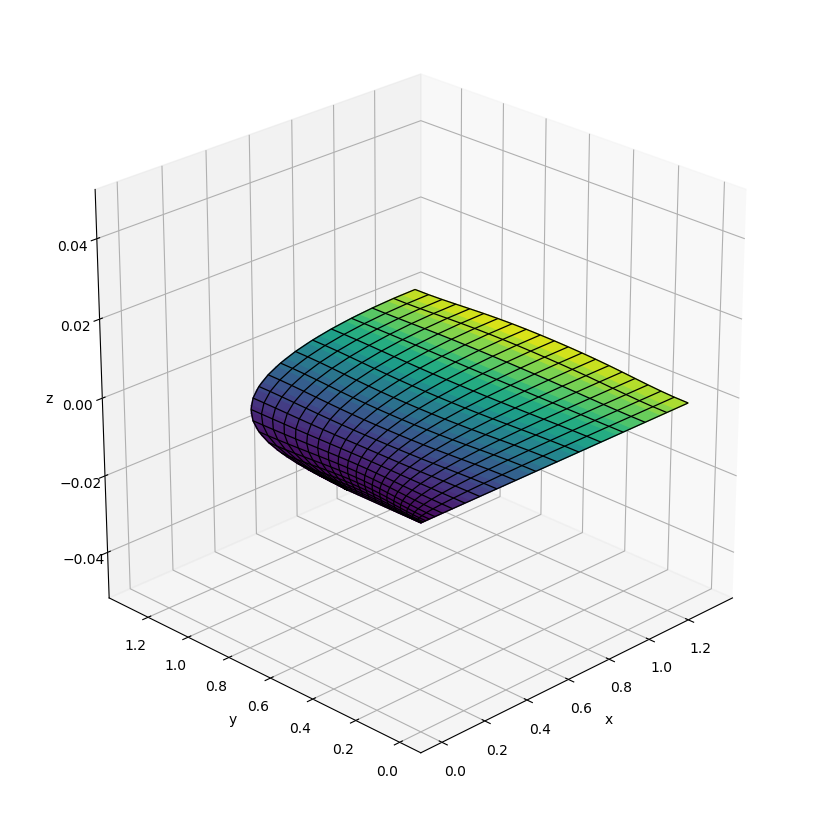

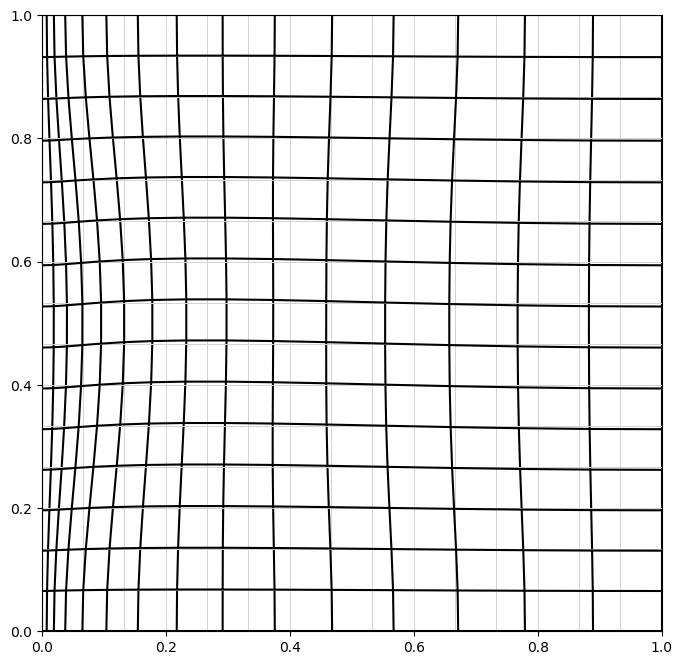

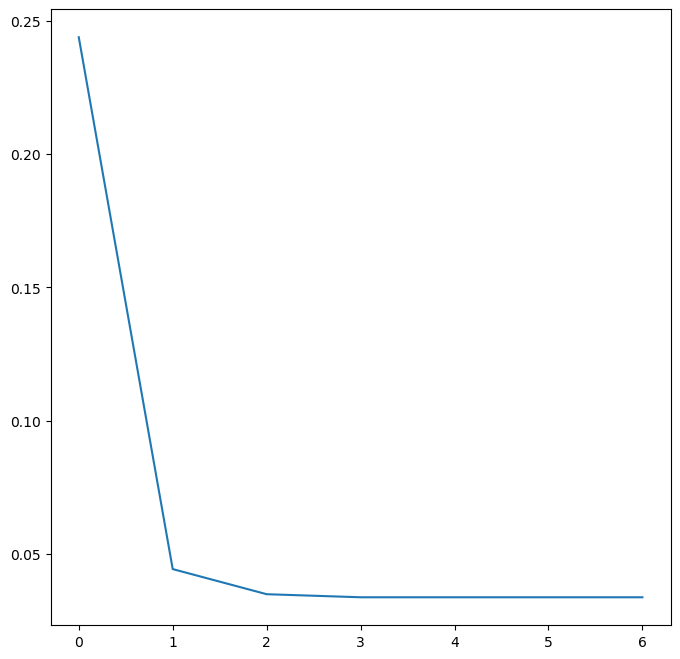

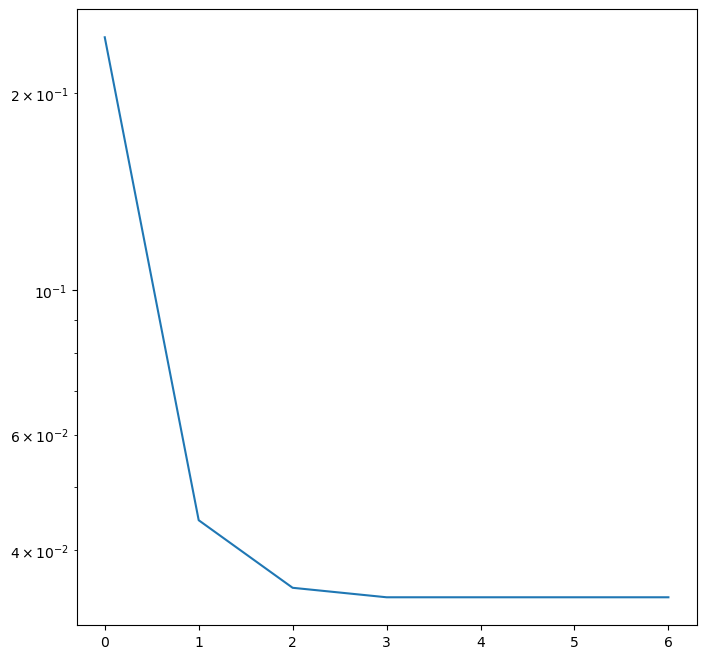

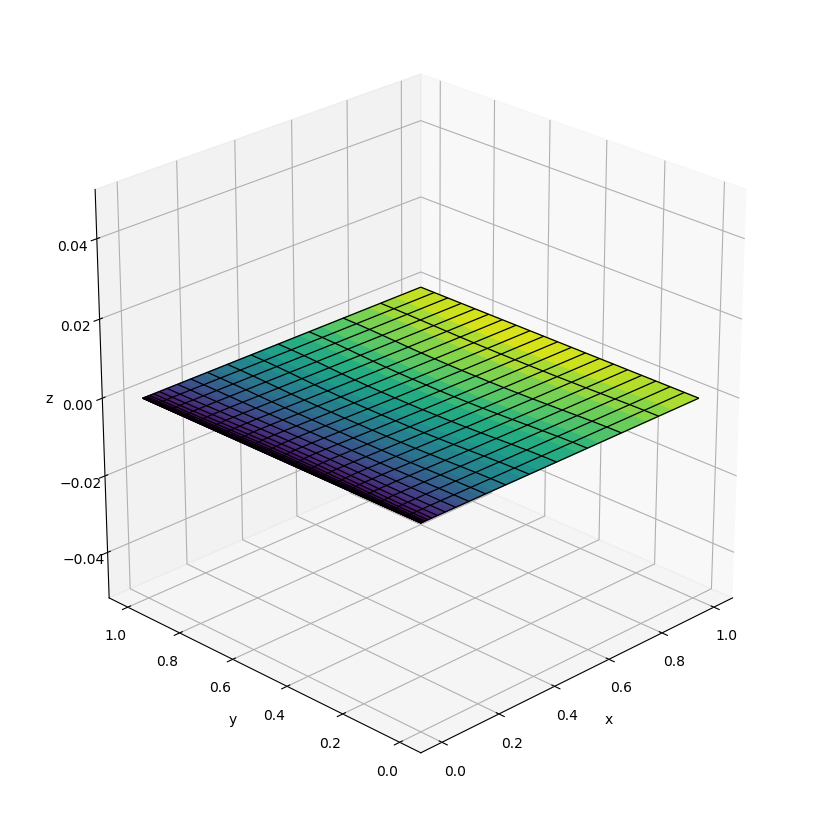

In [27]:
# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(R[length(R)], n_points=31, axis=ax, colorfunc=a_rw, colormap="viridis", shade=false)
plot_parametric_wireframe(R[length(R)], axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "regular-warped-matched-qmap.pdf")

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plot_diffeomorphism(ψ, axis=ax)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig(figurefolder * "regular-warped-diffeomorphsim.pdf")
show()

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(errors)
plt.savefig(figurefolder * "regular-warped-error-linear.pdf")
show()

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.semilogy(errors)
plt.savefig(figurefolder * "regular-warped-error-semilogy.pdf")
show()

# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f2 ∘ ψ, n_points=31, axis=ax, colorfunc=a_rw, colormap="viridis", shade=false,vmin=0, vmax=1)
plot_parametric_wireframe(f2 ∘ ψ, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "regular-warped-matched-surface.pdf")

## Warped to Regular Grid

In [ ]:
B1, DB1, divB1 = construct_basis(1);
R, DR, Γ, errors = SurfaceRegistrationAlgorithm(q1, q2, Dq2, B1, DB1, divB1,
    max_iter=10, error_change_tol=1e-10,
    armijo_constant=0.1, armijo_scaling=0.5, armijo_max_iter=50,
    verbose=false
)
# Construct Composed Diffeomorphism
ψ = ∘(Γ...)
a_wr = af(f2∘ψ)

In [7]:
# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(R[length(R)], n_points=31, axis=ax, colorfunc=a_wr, colormap="viridis", shade=false)
plot_parametric_wireframe(R[length(R)], axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "regular-warped-matched-qmap.pdf")


# Figure Warped
fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plot_parametric_surface(f2 ∘ ψ, n_points=31, axis=ax, colorfunc=a_wr, colormap="viridis", shade=false)
plot_parametric_wireframe(f2 ∘ ψ, axis=ax, color="k", lw=0.9)
subplots_adjust(top=1.0, bottom=0.0, left=0.0, right=1.0, hspace=0.0, wspace=0.0)
plt.savefig(figurefolder * "warped-regular-matched-surface.pdf")

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plot_diffeomorphism(ψ, axis=ax)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.savefig(figurefolder * "warped-regular-diffeomorphsim.pdf")
show()

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(errors)
plt.savefig(figurefolder * "warped-regular-error-linear.pdf")
show()

fig = figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.semilogy(errors)
plt.savefig(figurefolder * "warped-regular-error-semilogy.pdf")
show()

[SurfaceRegistration] Iter 0	Error=0.24379209189117165
[SurfaceRegistration] Iter 1	Error=0.19059243771536938
[SurfaceRegistration] Iter 2	Error=0.17685717139825868


InterruptException: InterruptException: